# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
bitcoin_api_response = requests.get(btc_url).json()
x = bitcoin_api_response['data']['1']['quotes']['USD']['price']
print(x)

# Fetch current ETH price
ethereum_api_response = requests.get(eth_url).json()
# ethereum_api_response
y = ethereum_api_response['data']['1027']['quotes']['USD']['price']
print(y)

# Compute current value of my crpto
my_btc_value = my_btc * x
my_eth_value = my_eth * y

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


27531.0
1842.4
The current value of your 1.2 BTC is $33037.20
The current value of your 5.3 ETH is $9764.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio


SPY                                               \
                            open    high    low   close    volume trade_count   
timestamp                                                                       
2020-07-14 04:00:00+00:00  313.3  319.76  312.0  318.93  93545651      580270   

                                          AGG                          \
                                 vwap    open    high     low   close   
timestamp                                                               
2020-07-14 04:00:00+00:00  316.244144  118.58  118.74  118.58  118.67   

                                                            
                            volume trade_count        vwap  
timestamp                                                   
2020-07-14 04:00:00+00:00  3986756       14580  118.667216

In [9]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $118.67
Current SPY closing price: $318.93


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")


The current value of your 50 SPY shares is $15946.50
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns =['Amounts'], index = ['crypto', 'shares'])
  
# Print the output.
df_savings

# Display savings DataFrame
display(df_savings)


,Amounts
crypto,42801.92
shares,39680.50


<Axes: ylabel='Amounts'>

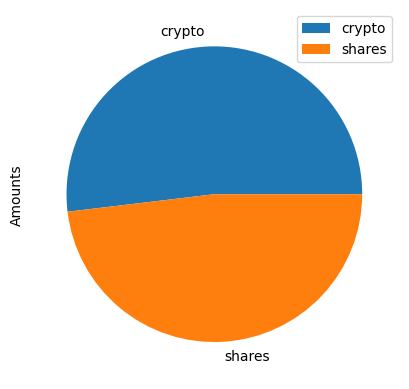

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y = 'Amounts')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.')
else:
    print(f'You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.')


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [15]:

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)


In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head() 

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
import warnings
warnings.filterwarnings('ignore')
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001669,0.996865,1.006461,1.006745,0.995580,1.004602,1.010978,0.989357,1.002479,1.002786,...,0.988440,0.991227,0.996306,0.996139,1.008792,1.001316,0.998151,0.990790,1.003711,0.995387
2,1.004591,1.011448,1.005315,1.020831,1.007204,0.999813,1.003823,0.979668,1.000268,1.010631,...,0.992874,0.996399,0.992424,0.995525,1.019424,1.002283,0.997992,1.001209,1.005790,1.004690
3,0.996084,0.999759,0.999835,1.022174,1.001064,0.996784,1.008149,0.979188,1.007136,1.009485,...,0.988279,0.991637,0.990656,0.998688,1.030746,0.995975,1.009532,0.998064,1.008215,1.006480
4,1.006660,1.010445,1.011712,1.017154,0.994219,1.000452,1.010282,0.973484,1.002540,1.004366,...,0.980861,0.990101,0.983195,1.003248,1.044332,0.990404,1.013300,0.992556,1.004222,0.998314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,46.509602,24.528091,17.651573,8.161655,13.128349,13.285271,7.140428,23.602153,21.117516,21.799190,...,7.371016,29.503737,3.220670,20.197065,22.258936,57.559885,11.649537,31.195197,28.112300,5.009090
7557,46.766989,24.530868,17.528656,8.064791,13.084681,13.229445,7.131358,23.605203,21.388458,21.698567,...,7.340043,29.280426,3.204826,20.293529,22.048843,57.029921,11.731675,30.666428,27.821894,4.938959
7558,46.744868,24.414838,17.554706,7.996211,13.120635,13.152306,7.267685,23.641096,21.530640,21.695276,...,7.339461,29.222190,3.221944,19.987791,21.962115,56.568540,11.704847,30.660008,27.852663,4.951567
7559,46.719468,24.643863,17.704566,7.896111,13.068467,13.299647,7.295175,23.396413,21.602199,21.466154,...,7.322136,29.166380,3.230964,19.611775,22.239784,56.900581,11.583497,30.767524,27.695064,4.976420


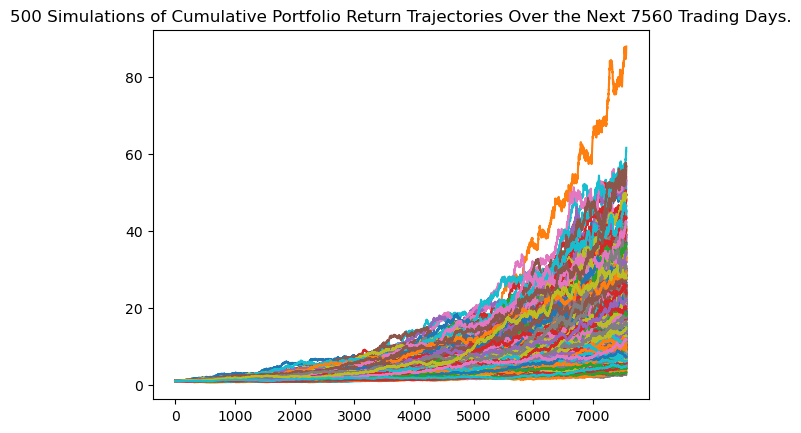

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()


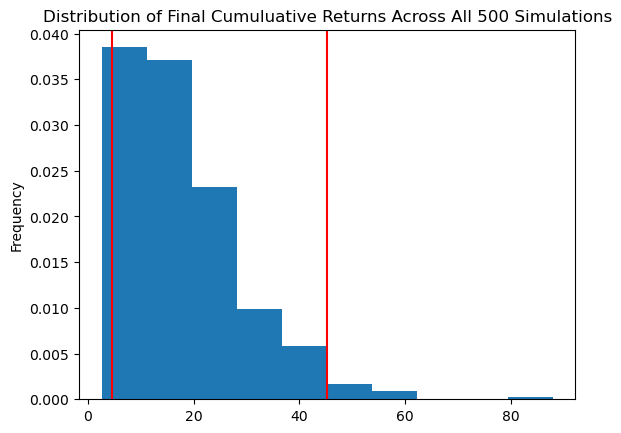

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean             17.919114
std              11.197374
min               2.630797
25%               9.689708
50%              15.014783
75%              23.221812
max              87.829397
95% CI Lower      4.524202
95% CI Upper     45.157121
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90484.03 and $903142.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*20000*1.5,2)
ci_upper = round(tbl[9]*20000*1.5,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135726.05 and $1354713.64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)


In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
import warnings
warnings.filterwarnings('ignore')
MC_five_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011905,0.998865,0.994598,0.986983,1.004034,1.010135,0.995479,1.005229,0.999255,1.006479,...,0.997632,0.997524,0.992925,1.003544,0.996654,1.000625,0.988936,1.006220,1.004545,1.005152
2,1.013629,1.000877,0.986803,0.983443,1.013852,1.008106,0.996740,1.007088,0.991492,1.001130,...,1.014295,0.998475,0.994664,1.005982,0.998603,1.004030,0.991519,1.009660,1.003117,0.988943
3,1.007958,1.000370,0.980045,0.984163,1.005466,1.015121,1.008388,1.013254,0.997639,0.994698,...,1.025274,1.002011,0.997159,1.007909,1.000830,0.997207,0.994356,1.011667,0.999300,0.995644
4,1.000960,1.003392,0.984634,0.977015,1.006470,1.018505,1.019114,1.020650,1.008050,0.989754,...,1.048188,0.990657,0.999166,1.010552,0.989192,0.995486,0.999653,1.010967,1.003642,0.991978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.604605,1.492952,1.612412,2.073250,2.224824,2.040692,1.105584,2.036858,1.858896,1.770231,...,1.451229,1.275990,2.053275,1.672310,2.346892,1.429438,1.375319,2.757393,2.310467,1.336065
1257,1.606711,1.498005,1.609928,2.109331,2.243494,2.049030,1.101785,2.034698,1.862374,1.751362,...,1.469370,1.271598,2.042860,1.664469,2.334964,1.420139,1.384677,2.773701,2.327514,1.332301
1258,1.612024,1.506364,1.609909,2.105760,2.248209,2.062913,1.105124,2.021289,1.869747,1.757393,...,1.485544,1.265005,2.046900,1.683600,2.352316,1.423200,1.385063,2.738254,2.320484,1.338806
1259,1.631724,1.499034,1.584805,2.092453,2.255185,2.058898,1.104467,2.060198,1.850745,1.740406,...,1.478604,1.252504,2.063172,1.654212,2.353764,1.444122,1.395500,2.739077,2.352038,1.342205


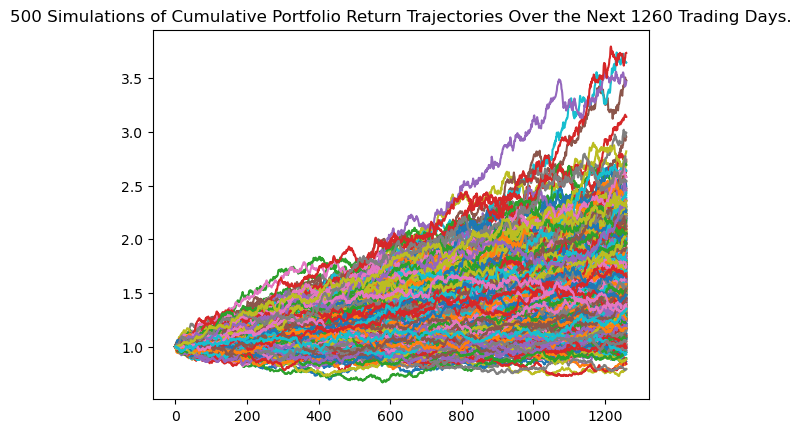

In [26]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()


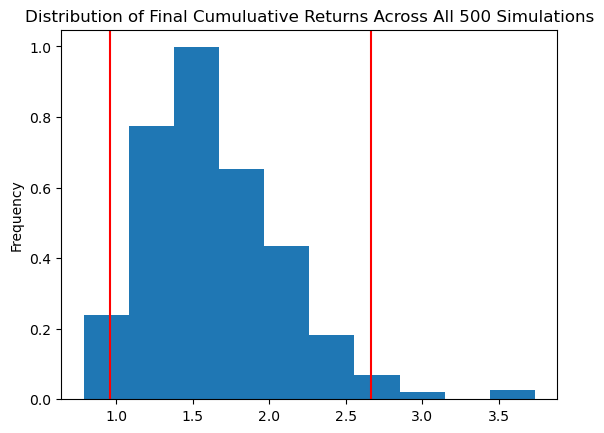

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()


In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.646278
std               0.451646
min               0.788923
25%               1.321946
50%               1.575562
75%               1.895755
max               3.736214
95% CI Lower      0.956159
95% CI Upper      2.666808
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57369.55 and $160008.47


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)


In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
import warnings
warnings.filterwarnings('ignore')
MC_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990247,1.006894,0.992414,1.000146,0.992851,1.009605,1.001752,0.997671,0.992116,1.001195,...,0.991736,1.003420,0.994150,1.008909,1.006745,1.001758,1.004360,0.989050,1.007519,0.987677
2,0.990831,0.997537,0.979487,1.008500,0.989200,1.013302,1.005427,0.981573,0.988875,1.006934,...,0.998912,1.007168,0.983781,1.013047,1.009438,1.005107,0.995526,0.977919,1.007531,0.986413
3,0.988371,1.005057,0.981033,1.009246,0.984812,1.011187,1.015620,0.983319,0.983767,1.008786,...,0.995694,0.990059,0.981272,1.018595,1.005282,1.003379,0.987448,0.968313,1.015685,0.991326
4,0.982731,1.008452,0.985312,1.013123,0.981589,1.014501,1.016326,0.982588,0.987729,1.003590,...,0.999954,1.006664,0.973522,1.025532,1.009764,1.005757,0.997217,0.961975,1.026581,0.996431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.778489,1.984738,1.258532,2.229786,2.070087,2.043301,3.549715,3.996296,3.358261,3.002960,...,1.984773,3.125321,2.265834,2.655652,3.369488,2.503506,2.116914,2.974905,2.907099,1.337005
2517,1.762152,2.000890,1.249640,2.226089,2.034551,2.050226,3.552922,3.978642,3.334846,3.003219,...,1.972975,3.125377,2.263748,2.658978,3.374979,2.484456,2.098898,2.961372,2.917926,1.353330
2518,1.761668,1.990819,1.255392,2.236450,2.024212,2.065896,3.531725,3.962200,3.314380,2.975397,...,1.983845,3.124923,2.252737,2.656039,3.409140,2.494497,2.064930,2.958583,2.911756,1.348402
2519,1.777368,1.979447,1.253139,2.228869,2.005468,2.074661,3.525001,3.993039,3.354754,2.990301,...,1.992583,3.148832,2.256490,2.600142,3.415879,2.519968,2.072435,2.936433,2.941203,1.347288


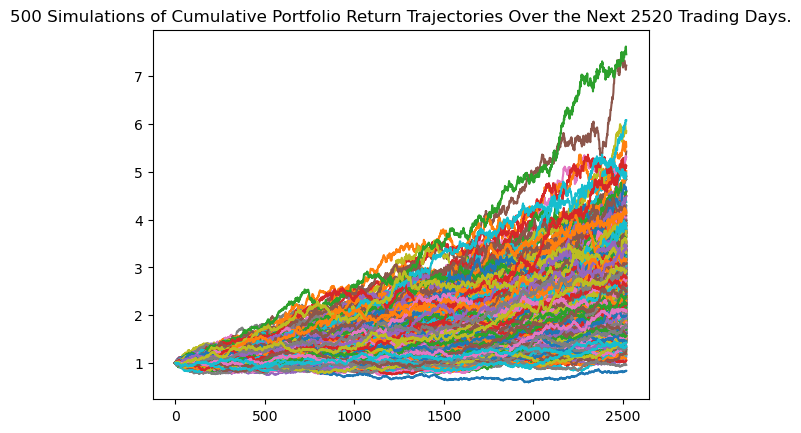

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()


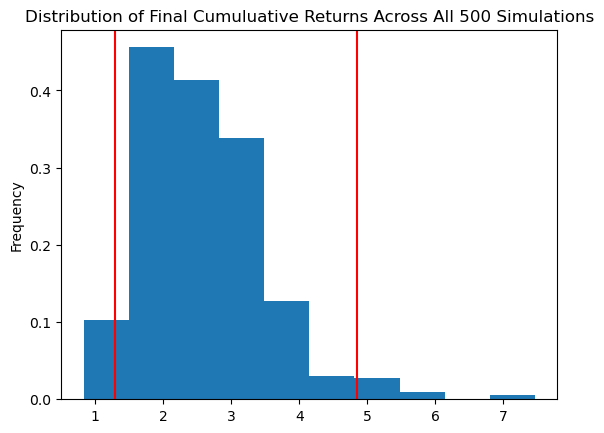

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.581250
std               0.908146
min               0.836474
25%               1.913155
50%               2.425377
75%               3.074704
max               7.461543
95% CI Lower      1.290390
95% CI Upper      4.847193
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77423.4 and $290831.55


## Higher Stock Than Bond Ratio, Five Year Retirement, $20,000 Initial Investment

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
import warnings
warnings.filterwarnings('ignore')
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006390,1.005457,1.007532,1.009083,0.997654,1.001176,1.002623,0.990196,0.998644,1.004516,...,0.998673,1.011820,1.000445,0.993644,0.998485,0.995061,1.001063,0.999666,0.999358,1.000371
2,1.008303,1.003177,1.006729,1.012714,1.002705,0.996443,1.002891,0.993439,0.999133,1.012286,...,1.003165,1.020028,0.997706,0.993573,0.996017,0.997399,0.997538,0.989717,1.000294,1.000738
3,1.006917,1.009677,0.998157,1.015731,0.990967,0.993110,1.006841,0.988909,1.004994,1.015920,...,1.006721,1.023183,0.997719,0.987506,0.993313,1.006537,1.007017,0.982395,0.997470,1.005012
4,1.013398,1.003186,0.986516,1.019585,0.982179,0.988270,1.011238,0.983018,1.003495,1.020252,...,1.017123,1.012127,0.998785,0.993732,1.004579,1.008033,1.003361,0.993819,0.997215,1.005141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.380499,1.533502,1.251755,1.426286,1.521847,1.316665,1.436308,1.005167,1.423311,1.181720,...,1.507816,1.309639,1.618319,1.042187,1.135913,1.393263,1.143828,1.243525,1.372599,1.187782
1257,1.373568,1.535552,1.263377,1.430690,1.515737,1.324681,1.417158,1.006613,1.429871,1.180135,...,1.507949,1.303656,1.612383,1.042847,1.145056,1.395610,1.142452,1.239435,1.384551,1.188199
1258,1.368093,1.530630,1.250848,1.440704,1.512319,1.316671,1.412989,1.005573,1.430716,1.193044,...,1.499313,1.302908,1.622380,1.040732,1.148050,1.390174,1.146790,1.243040,1.369407,1.187192
1259,1.358541,1.536965,1.245641,1.435596,1.508507,1.316330,1.419268,1.004120,1.428952,1.192413,...,1.497709,1.298969,1.625424,1.045809,1.146008,1.387690,1.142025,1.240146,1.368486,1.184670


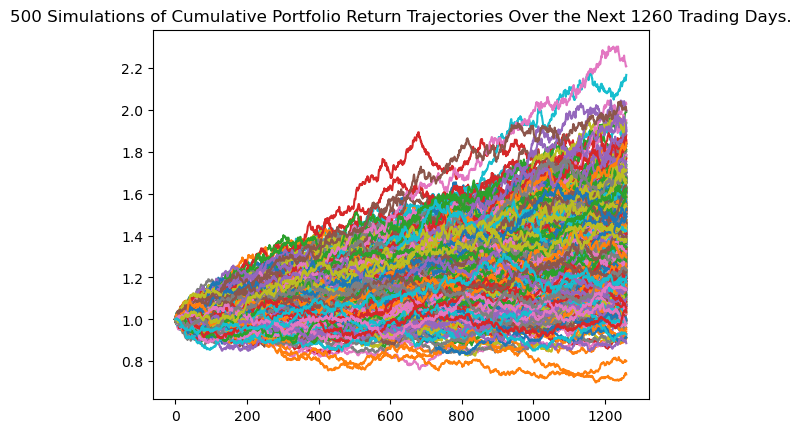

In [41]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()


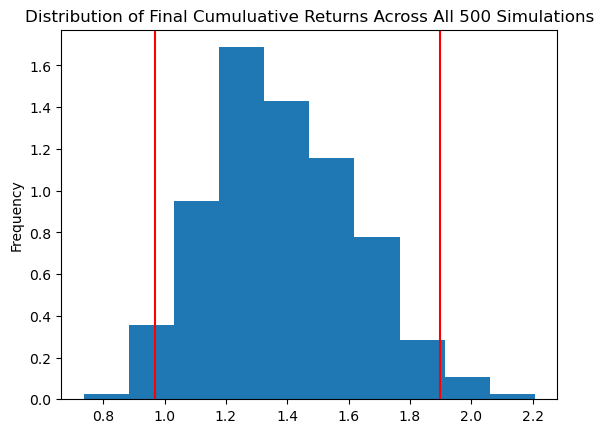

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()


In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.385380
std               0.239052
min               0.737378
25%               1.219681
50%               1.365947
75%               1.553526
max               2.207323
95% CI Lower      0.968293
95% CI Upper      1.897127
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*20000,2)
ci_upper_five = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19365.86 and $37942.54
